## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

Adjacency Dictionary:
{'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975'], 'tyn1998': ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0

C:\Users\Jetty\AppData\Local\Temp\ipykernel_94488\2429737829.py:107: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Influence Score")


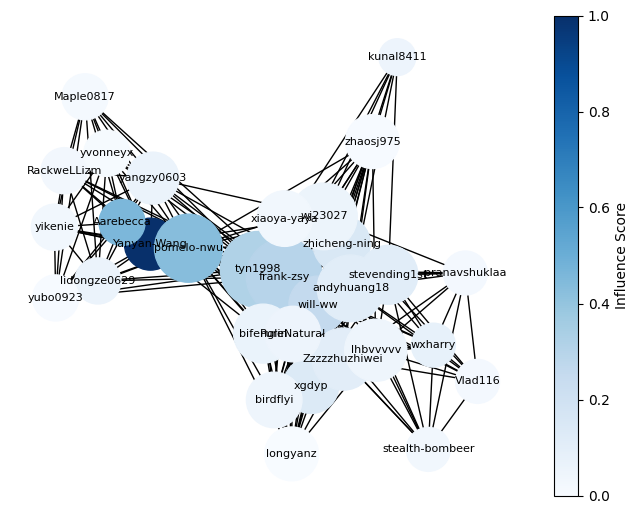

In [12]:
import json
from collections import defaultdict

# 读取数据文件
with open(".\data\hw4_data.json", "r") as f:
    data = json.load(f)

# 提取节点和边数据
nodes = data["nodes"]  # 用户节点信息
edges = data["edges"]  # 边关系信息

# 构建邻接字典
adjacency_dict = {}

for user, score in nodes:
    adjacency_dict[user] = []

for user1, user2, weight in edges:
    adjacency_dict[user1].append(user2)
    adjacency_dict[user2].append(user1)  # 因为是无向图

print("Adjacency Dictionary:")
print(adjacency_dict)
#b 找出每个用户的直接朋友
for user in adjacency_dict:
    friends = adjacency_dict[user]
    print(f"{user}'s friends: {friends}")

#2 计算每个用户的度数
degree_dict = {user: len(friends) for user, friends in adjacency_dict.items()}

# 找出度数最多的前5个用户并列出他们的朋友数量
top_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 users by degree:")
print(top_degrees)
for user, degree in top_degrees:
    print(f"{user} has {degree} friends.")

# 通过影响力分数找出前5个用户
top_influence = sorted(nodes, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 users by influence score:")
print(top_influence)

#3 综合考虑影响力得分和朋友数量
combined_scores = {user: (score * 0.5 + degree_dict[user] * 0.5) for user, score in nodes}
top_combined = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 users by combined score:")
print(top_combined)

def recommend_friends(user, adjacency_dict):
    friends_of_friends = {}
    friends = adjacency_dict[user]
    
    for friend in friends:
        for fof in adjacency_dict[friend]:
            if fof != user and fof not in friends:  # 排除自己和已存在的朋友
                if fof not in friends_of_friends:
                    friends_of_friends[fof] = 0
                friends_of_friends[fof] += 1

    # 按照共同朋友数量排序
    recommended = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)
    return recommended

print("Recommended friends for Yanyan-Wang:")
print(recommend_friends("Yanyan-Wang", adjacency_dict))

def recommend_by_strength(user, edges):
    strength_dict = {}
    
    for u1, u2, weight in edges:
        if u1 == user or u2 == user:
            other_user = u2 if u1 == user else u1
            strength_dict[other_user] = strength_dict.get(other_user, 0) + weight
            
    # 按照连接强度排序
    recommended_strength = sorted(strength_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    return recommended_strength

print("Top 5 users by connection strength for Yanyan-Wang:")
print(recommend_by_strength("Yanyan-Wang", edges))

import networkx as nx
import matplotlib.pyplot as plt

# 创建图对象
G = nx.Graph()

# 添加节点及其属性
for node, score in influence_scores.items():
    G.add_node(node, size=degree_count[node], influence=score)

# 添加边及其权重
for edge in edges:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 绘图
pos = nx.spring_layout(G)  # 使用弹簧布局

# 节点大小和颜色表示影响力得分和度数
node_sizes = [100 * G.nodes[node]["size"] for node in G]
node_colors = [G.nodes[node]["influence"] for node in G]

# 绘制节点和边
nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, with_labels=True, font_size=8)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Influence Score")

# 显示图
plt.show()

